<a href="https://colab.research.google.com/github/sujaysc/dataScience/blob/master/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[7.20999950e+07 0.00000000e+00 5.00000000e+00 0.00000000e+00]
 [7.20999917e+07 5.52890702e+00 4.53013468e+00 9.80982385e-01]
 [7.20999883e+07 1.51826938e+01 5.60094272e+00 2.01570211e+00]
 [7.20999834e+07 2.93258425e+01 8.73427128e+00 3.48401470e+00]
 [7.20999754e+07 4.85797691e+01 1.44482234e+01 5.87428581e+00]
 [7.20999624e+07 7.37874312e+01 2.33025514e+01 9.78767769e+00]
 [7.20999418e+07 1.06008957e+02 3.59319966e+01 1.59505652e+01]
 [7.20999109e+07 1.46537264e+02 5.30745559e+01 2.52333442e+01]
 [7.20998661e+07 1.96928126e+02 7.55988238e+01 3.86750380e+01]
 [7.20998033e+07 2.59042278e+02 1.04533056e+02 5.75138018e+01]
 [7.20997176e+07 3.35099015e+02 1.41097836e+02 8.32238973e+01]
 [7.20996031e+07 4.27741883e+02 1.86743887e+02 1.17560060e+02]
 [7.20994530e+07 5.40117905e+02 2.43196475e+02 1.62610495e+02]
 [7.20992588e+07 6.75972418e+02 3.12507924e+02 2.20860046e+02]
 [7.20990108e+07 8.39762240e+02 3.97119916e+02 2.95265423e+02]
 [7.20986972e+07 1.03679046e+03 4.99937513e+02 3.893447

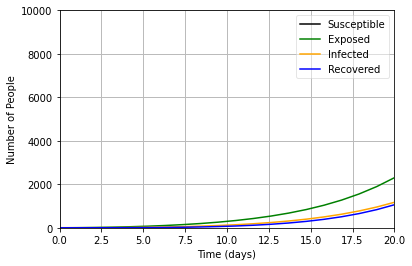

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 27 21:58:25 2020

@author: Padmanaban
"""

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# total population
N = 72100000

#initial exposed
E0 = 0

# initial infected
I0 = 5

# initial recovered
R0 = 0

#initial susceptible
S0 = N - I0 - R0 - E0

# contact rate
beta = 2/3 # R0/Infectious period

# incubation rate
sigma = 1/5 #incubation period

# mean recovery rate
gamma = 1/5  # 1/duration of hospitalization

# initial conditions vector
y0 = S0, E0, I0, R0
# 200 evenly spaced values (representing days)
t = np.linspace(0, 20, 20)

def func(y, t, N, beta, sigma, gamma):
    # S, I, E, R values assigned from vector
    S, E, I, R = y
    # differential equations
    dSdt = -beta * S * I / N
    dEdt = I0 * t + beta * S * I / N - sigma * E  
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# Integrate the diff eqs over the time array
values = odeint(func, y0, t, args=(N, beta, sigma, gamma))
# assign S, E, I, R values from values transpose
S, E, I, R = values.T
print(values)
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'black', lw=1.5, label='Susceptible')
ax.plot(t, E, 'green', lw=1.5, label='Exposed')
ax.plot(t, I, 'orange', lw=1.5, label='Infected')
ax.plot(t, R, 'blue', lw=1.5, label='Recovered')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of People')
ax.set_ylim(0,10000)
ax.set_xlim(0,20)
ax.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()